In [58]:
from config import *
import requests
import plotly
import matplotlib.pyplot as plt
import yfinance as yf
import os
import sys
import pandas as pd
from scipy.stats import pearsonr

# Global Vars

In [18]:
BASE_FRED = 'https://api.stlouisfed.org/fred/series/observations'

# Functions

In [3]:
def pullHistoricalPrices(tickers):
    ticker_histories = dict()
    for ticker_i in tickers:
        ticker_histories[ticker_i] = yf.Ticker(ticker_i).history(period="max").reset_index()
    return ticker_histories

# Pull Data

In [4]:
with open('./data/tickers.txt', 'r') as fp:
    tickers = [x.replace('\n', '') for x in fp.readlines()]

In [5]:
ticker_histories = pullHistoricalPrices(tickers)

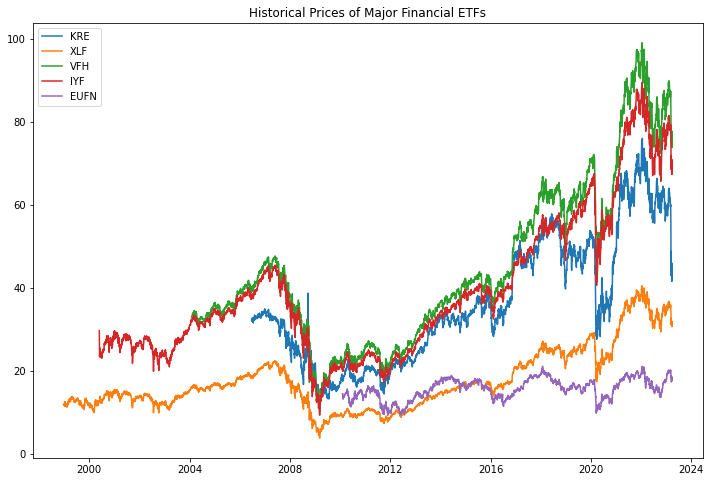

In [6]:
plt.figure(figsize=(12,8))
for ticker_i in ticker_histories:
    df_ticker = ticker_histories[ticker_i]
    plt.plot(df_ticker['Date'], df_ticker['Open'], label=ticker_i)
plt.legend()
plt.title('Historical Prices of Major Financial ETFs')
plt.show()

### Case Study KRE

# Economic Data

In [54]:
series_list = ['CORESTICKM159SFRBATL', 'UNRATE', 'T10Y2Y', 'DPRIME']
# 'FF'

In [55]:
indicators_histories = dict()
for series_i in series_list:
    parameters = {
        'api_key': TOKEN_FRED,
        'series_id': series_i,
        'observation_start': '2000-01-01', # YYYY-MM-DD 
        'file_type': 'json'
    }

    response_json = requests.get(BASE_FRED, parameters).json()
    df_indicator = pd.DataFrame(response_json['observations'])
    df_indicator = df_indicator[df_indicator['value'] != '.']
    df_indicator['date'] = pd.to_datetime(df_indicator['date'])
    df_indicator['value'] = df_indicator['value'].astype('float')
    indicators_histories[series_i] = df_indicator

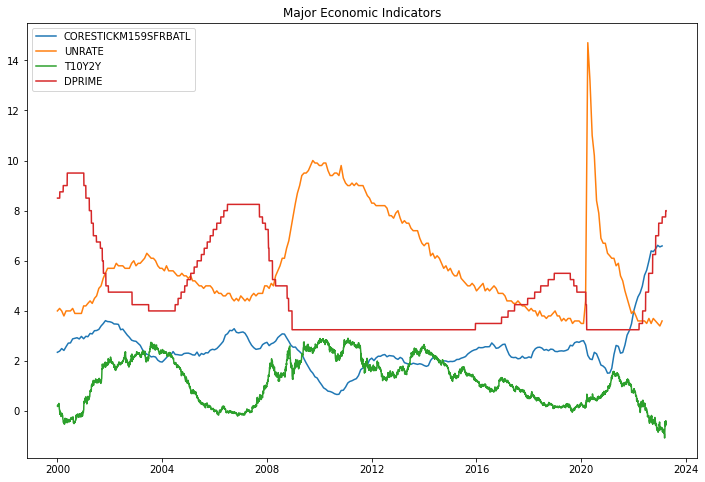

In [56]:
plt.figure(figsize=(12,8))
for indicator_i in indicators_histories:
    df_indicator = indicators_histories[indicator_i]
    plt.plot(df_indicator['date'], df_indicator['value'], label=indicator_i)
plt.legend()
plt.title('Major Economic Indicators')
plt.show()

### Relationship Analysis

Inflation & Interest Rates

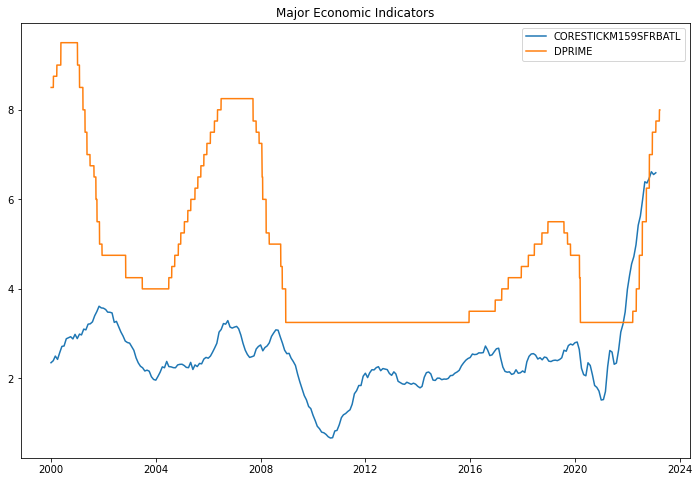

In [57]:
plt.figure(figsize=(12,8))
for indicator_i in ['CORESTICKM159SFRBATL', 'DPRIME']:
    df_indicator = indicators_histories[indicator_i]
    plt.plot(df_indicator['date'], df_indicator['value'], label=indicator_i)
plt.legend()
plt.title('Major Economic Indicators')
plt.show()

0.3831463666341288


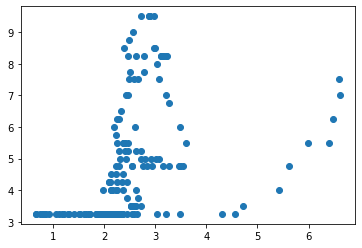

In [69]:
df_join = indicators_histories['CORESTICKM159SFRBATL'].merge(indicators_histories['DPRIME'], on='date', how='inner')

plt.scatter(df_join['value_x'], df_join['value_y'])
corr, _ = pearsonr(df_join['value_x'], df_join['value_y'])
print(corr)

# Archive

In [32]:
# add_on = '/stock/{0}/chart/{1}'.format(ticker_i, '5y')
# parameters = {
#     'token':TOKEN_IEX,
# }
# tickers_json = requests.get(BASE_URL + add_on, parameters)